In [1]:
from HeatModel import *
import time

In [2]:
n = 50
maxIterations = 10000
A = HeatModel(n)

In [3]:
# Start timing for Jacobi Method
start_time_Jacobi = time.time()
# Solve the system using Jacobi for 10,000 Iterations without stopping at tolerance
x_jacobi, count_jacobi, tols_jacobi = A.solveJacobi(nIter=maxIterations, stop=False)
# End timing for Jacobi Method
end_time_Jacobi = time.time()
# Calculate the elapsed time
elapsed_time_Jacobi = end_time_Jacobi - start_time_Jacobi

# Start timing for Gauss-Seidel Method
start_time_Gauss = time.time()
# Solve the system using Gauss-Seidel for 10,000 Iterations without stopping at tolerance
x_gauss, count_gauss, tols_gauss = A.GaussSeidel(nIter=maxIterations, stop=False)
# End timing for Gauss-Seidel Method
end_time_Gauss = time.time()
elapsed_time_Gauss = end_time_Gauss - start_time_Gauss

print(f'Jacobi Method Iterative Solver Runtime: {elapsed_time_Jacobi//60} minutes and {elapsed_time_Jacobi % 60} seconds')
print(f'Gauss-Seidel Method Iterative Solver Runtime: {elapsed_time_Gauss//60} minutes and {elapsed_time_Gauss % 60} seconds')

Jacobi Method Iterative Solver Runtime: 0.0 minutes and 0.7489180564880371 seconds
Gauss-Seidel Method Iterative Solver Runtime: 2.0 minutes and 48.271153926849365 seconds


#### **For a 50 x 50 Matrix, with 10,000 iterations running on an M3 Macbook Air, the Jacobi method takes less than 1 second while the Gauss-Seidle Method took about 2 minutes and 40 seconds.**

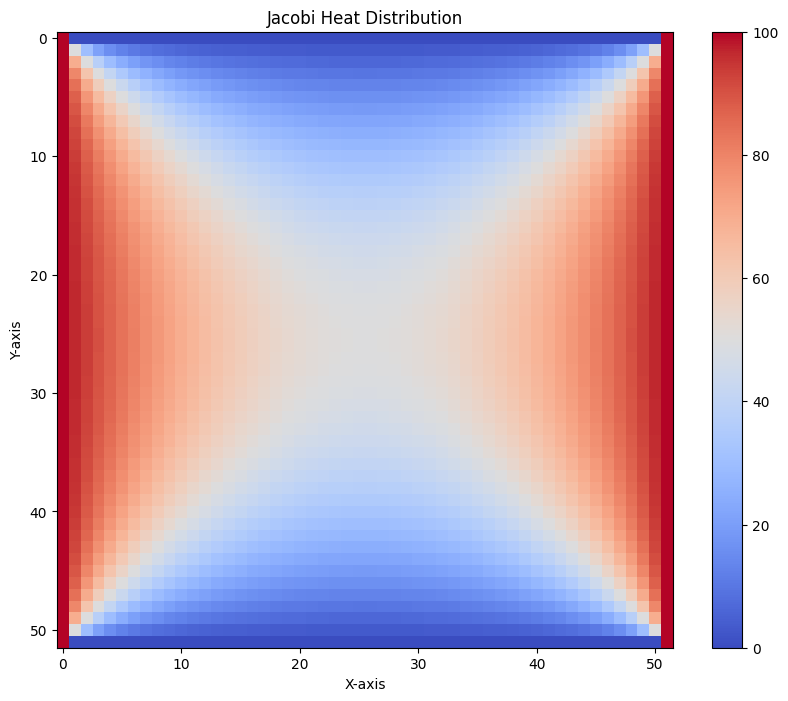

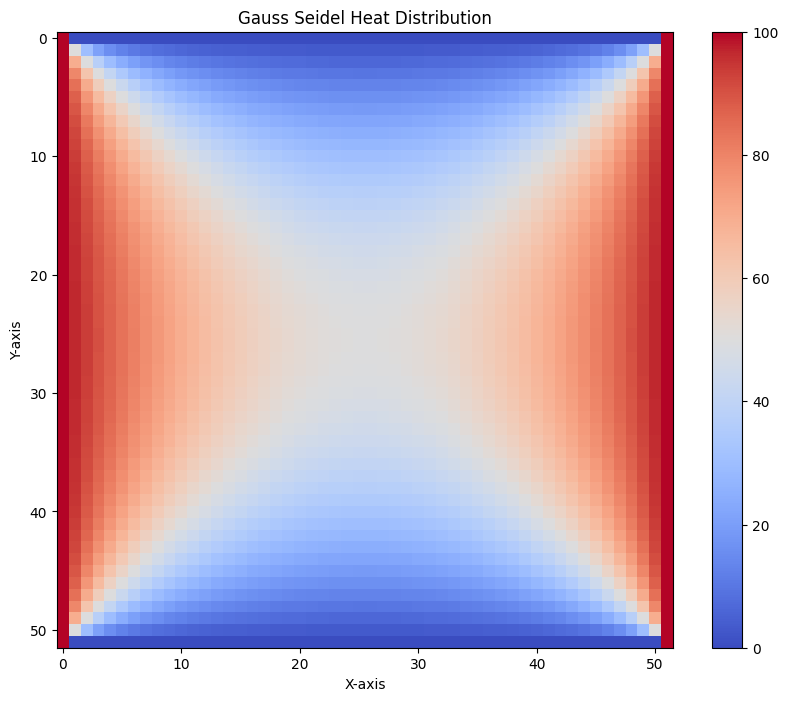

In [4]:
A.visualizeHeatDistribution(x_jacobi, title = 'Jacobi Heat Distribution')
A.visualizeHeatDistribution(x_gauss, title = 'Gauss Seidel Heat Distribution')

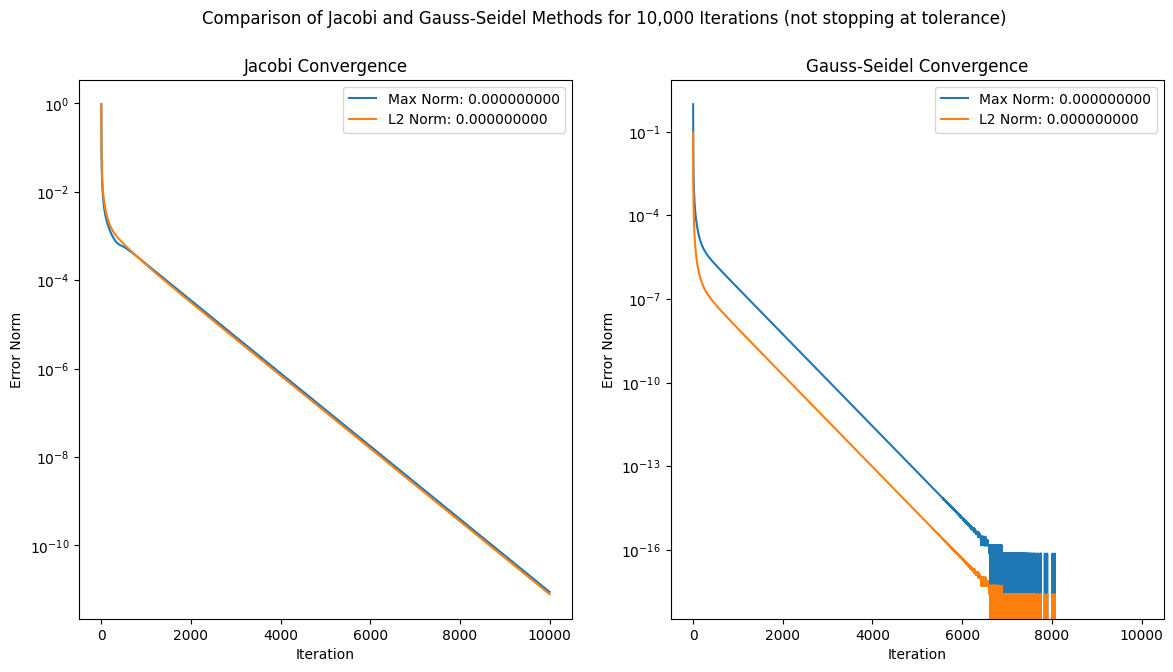

In [5]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plot for Jacobi
plt.subplot(1, 2, 1)
#plt.semilogy(np.arange(count_jacobi), tols_jacobi[0], label = f'Error Norm: {tols_jacobi[0,-1]:.9f}')
plt.semilogy(np.arange(count_jacobi), tols_jacobi[1], label = f'Max Norm: {tols_jacobi[1,-1]:.9f}')
plt.semilogy(np.arange(count_jacobi), tols_jacobi[2], label = f'L2 Norm: {tols_jacobi[2,-1]:.9f}')
plt.title('Jacobi Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error Norm')
plt.legend()

# Plot for Gauss-Seidel
plt.subplot(1, 2, 2)
plt.semilogy(np.arange(count_gauss), tols_gauss[0], label = f'Max Norm: {tols_gauss[0,-1]:.9f}')
plt.semilogy(np.arange(count_gauss), tols_gauss[1], label = f'L2 Norm: {tols_gauss[1,-1]:.9f}')
plt.title('Gauss-Seidel Convergence')
plt.xlabel('Iteration')
plt.ylabel('Error Norm')
plt.legend()

plt.suptitle('Comparison of Jacobi and Gauss-Seidel Methods for 10,000 Iterations (not stopping at tolerance)')
plt.show()

In [6]:
maxNormCountJacobi = np.where(tols_jacobi[1] < 1e-8)
print(f"The Jacobi Solver's Max Norm reached tolerance in {maxNormCountJacobi[0][0]} iterations")
l2NormCountsJacobi = np.where(tols_jacobi[2] < 1e-8)
print(f"The Jacobi Solver's L2 Norm reached tolerance in {l2NormCountsJacobi[0][0]} iterations")

print()

maxNormCountGauss = np.where(tols_gauss[0] < 1e-8)
print(f"The Gauss Solver's Max Norm reached tolerance in {maxNormCountGauss[0][0]} iterations")
l2NormCountsGauss = np.where(tols_gauss[1] < 1e-8)
print(f"The Gauss Solver's L2 Norm reached tolerance in {l2NormCountsGauss[0][0]} iterations")

print()

print(f'Jacobi Method Iterative Solver Runtime: {elapsed_time_Jacobi//60} minutes and {elapsed_time_Jacobi % 60} seconds')
print(f'Gauss-Seidel Method Iterative Solver Runtime: {elapsed_time_Gauss//60} minutes and {elapsed_time_Gauss % 60} seconds')

The Jacobi Solver's Max Norm reached tolerance in 6297 iterations
The Jacobi Solver's L2 Norm reached tolerance in 6236 iterations

The Gauss Solver's Max Norm reached tolerance in 1839 iterations
The Gauss Solver's L2 Norm reached tolerance in 960 iterations

Jacobi Method Iterative Solver Runtime: 0.0 minutes and 0.7489180564880371 seconds
Gauss-Seidel Method Iterative Solver Runtime: 2.0 minutes and 48.271153926849365 seconds


##### Given our results, we can immediately see a few things, one of them being that the Gauss-Seidel does converge in fewer iterations than the Jacobi method. 
   * The Gauss Seidel converges within 1839 iterations when looking at the max norm, while the Jacobi method did so in 6297. However running the solvers for 10000 iterations revealed that there is a significant difference in runtimes between the 2 methods.
      * For all 10,000 iterations, the Jacobi method took less than a second consistently, while Gauss-Seidel never performed under 2 minutes and 50 seconds for a grid size of 50 x 50. 
      * Now the question is if converging in 4460 (6297 - 1839) faster iterations is worth an additional 154 seconds (155 - 1) or 2 minutes and 35 seconds in runtime, not taking into account computation complexity, when we can arrive at the same result with Jacobi. For this system obviously not; however there might be a benefit of using Gauss-Seidel on larger systems.


* Given we are using tolerance as our model's main 'parameter' of accuracy, both Jacobi and Gauss Seidel will be equally accurate as long as they reach it.

* Then our only concern in the scope of our interest of heat distribution boils down to respective model runtimes in order to reach tolerance for each respective algorithm.

* Since Jacobi consistently reaches tolerance for our model of n x n resolution in less time, it initially makes sense to use Jacobi for further analysis within our system.

## Another thing we could test for is Iteration Convergence and Runtime comparisons for both models

In [7]:
sizes = [6, 10, 20, 30, 50]
max_iterations_list = [1000, 5000, 10000]
results = {
    'method': [],
    'size': [],
    'max_iterations': [],
    'runtime': [],
    'converged': [],
    'convergence_iteration': []
}
for method in ['Jacobi', 'GaussSeidel']:
    for size in sizes:
        for max_iterations in max_iterations_list:
            heat_model = HeatModel(size)
            start_time = time.time()
            if method == 'Jacobi':
                _, count, tols = heat_model.solveJacobi(nIter=max_iterations, stop=False)
                tol_indx = 1
            else:
                _, count, tols = heat_model.GaussSeidel(nIter=max_iterations, stop=False)
                tol_indx = 0
            runtime = time.time() - start_time
            converged = np.any(tols[tol_indx, :] < 1e-8)
            convergence_iteration = np.argmax(tols[tol_indx, :] < 1e-8) if converged else -1
            
            results['method'].append(method)
            results['size'].append(size)
            results['max_iterations'].append(max_iterations)
            results['runtime'].append(runtime)
            results['converged'].append(converged)
            results['convergence_iteration'].append(convergence_iteration if converged else max_iterations)

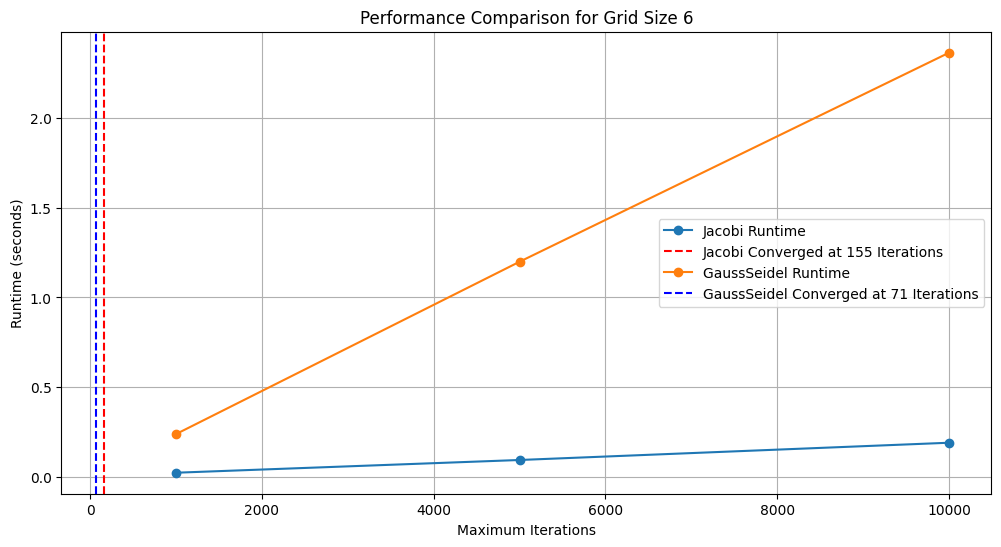

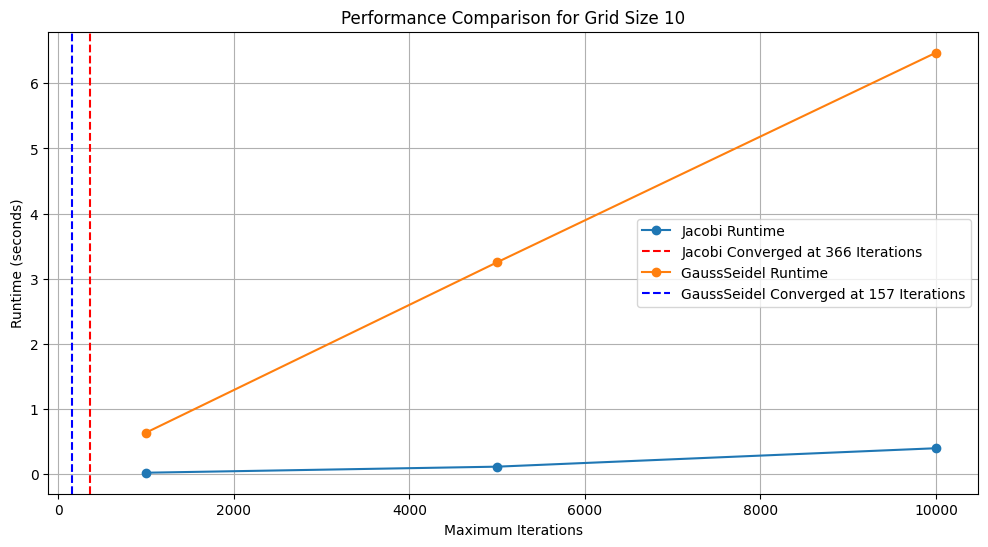

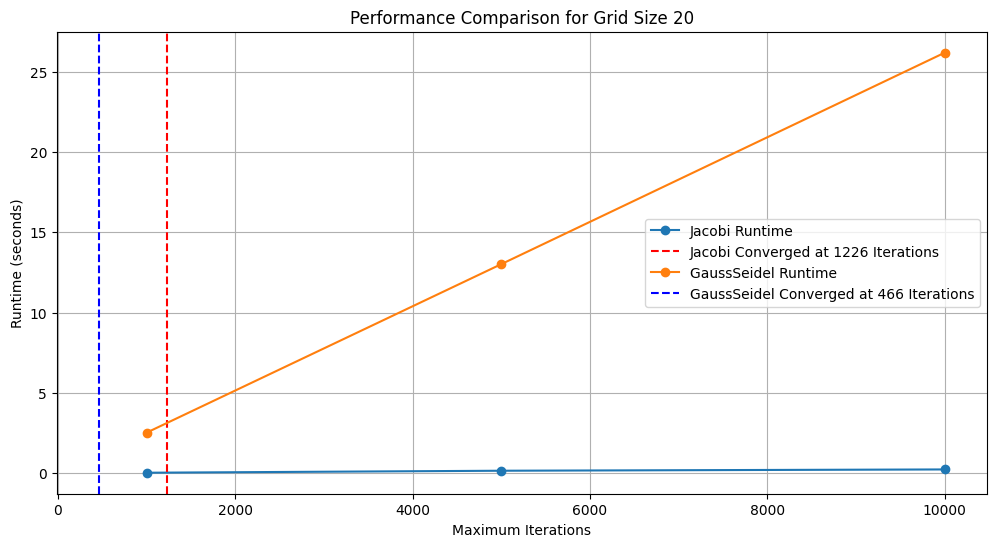

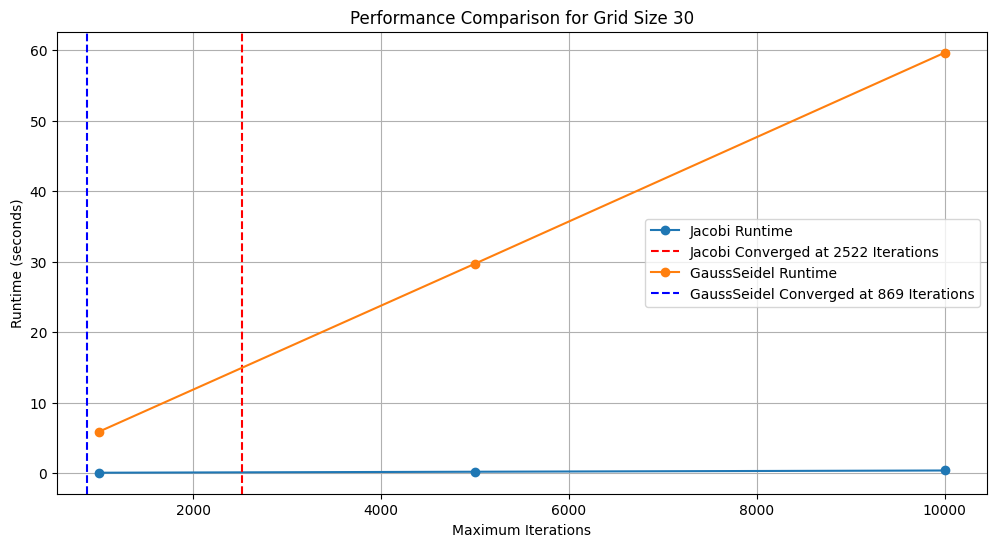

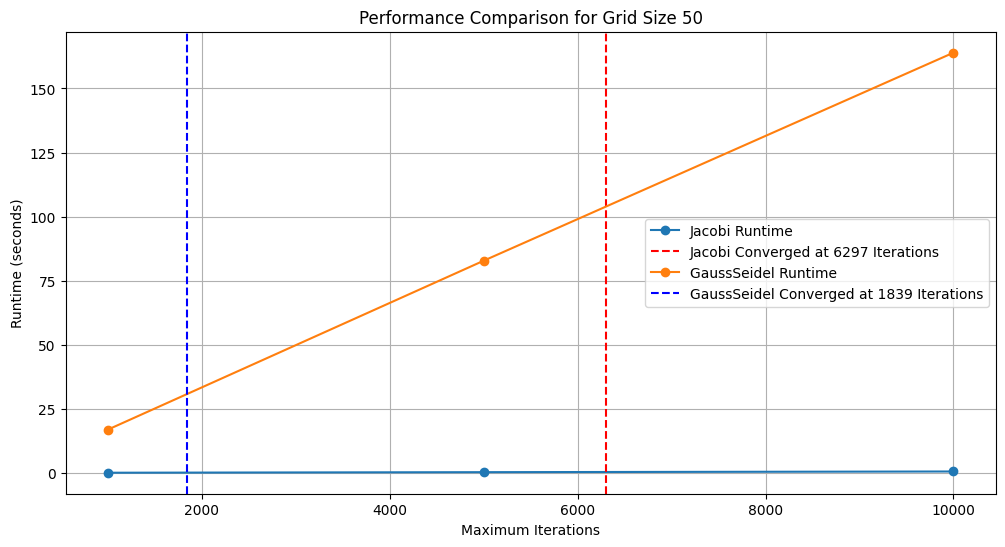

In [8]:
for size in sizes:
    plt.figure(figsize=(12, 6))
    
    for method in ['Jacobi', 'GaussSeidel']:
        method_indices = [i for i, m in enumerate(results['method']) if m == method and results['size'][i] == size]
        max_iter_values = [results['max_iterations'][i] for i in method_indices]
        runtime_values = [results['runtime'][i] for i in method_indices]
        convergence_iters = [results['convergence_iteration'][i] for i in method_indices if results['converged'][i]]

        # Plot runtime vs. max iterations for the method
        plt.plot(max_iter_values, runtime_values, 'o-', label=f'{method} Runtime')
        
        # Mark convergence points
        plt.axvline(x=convergence_iters[0], color='r' if method == 'Jacobi' else 'b', linestyle='--', label=f'{method} Converged at {convergence_iters[0]} Iterations')

    plt.title(f'Performance Comparison for Grid Size {size}')
    plt.xlabel('Maximum Iterations')
    plt.ylabel('Runtime (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

* In these illustrations we can see more clearly the summarization of our model.
1. Gauss-Seidel Converges in less iterations compared to the jacobi method.
2. As expected, the Gauss-Seidel Method consisently takes longer than the Jacobi method to perform the same number of iterations.

***ONE IMPORTANT THING TO NOTE IS THAT AS WE INCREASE THE RESOLUTION OF OUR MODEL, THE CONVERGANCE ITERATION COUNT FOR JACOBI AND GAUSS SEIDEL BECOME MORE AND MORE SIGNIFICANT***

*THIS SUGGESTS THAT AS THE RESOLUTION BECOMES VERY LARGE GAUSS-SEIDEL MIGHT BE MORE USEFUL TO SOLVE THAT SYSTEM, HOWEVER THE RUNTIME DIFFERENCES FOR BOTH METHODS ARE SO FAR APART, THAT THE SYSTEM MIGHT HAVE TO BE EXTREMELY LARGE FOR GAUSS SEIDEL TO MAKE UP IN RUNTIME*


**For our purposes Jacobi continues to be the better option until we can prove otherwise.**

* At each resolution the Gauss-Seidel model takes longer for each maxIteration, and at each resolution the trend shows:
  1. The Jacobi Method takes a shorter time go through all iterations
  2. The Jacobi method is shown to scale better as well. (When the number of maxIteration increases, the marginal increase in runtime is shown to be more convenient for us using Jacobi).
  3. Gauss-Seidel Method takes way less iterations to converge. However, this might be unimportant for our practical purposes, since we are really interested in accuracy and runtimes. 
  
**When I say practical purposes, what I am referring to is being able to visualize, manipulate, and analyze a model. In the practical world, we are interested in the correct answer in the shortest and cheapest way possible; in the scope of this project our only interest is in minimizing runtime, since both models will reach tolerance (equally accurate), regardless of how many iterations it takes.**

**Given these results we would expect this trend to continue and opt to use the Jacobi method for further analysis, only adjusting tolerances and Max Iterations as needed to achieve required accuracy, UNLESS system is so large that Gauss-Seidel Makes sens.**

1. Given the previous findings I believe that a way to improve our model would be to use Jacobi method for most applications.
* Given we are looking for accuracy in our model to assess, predict or visualize a system, therefore our main concerns are:
* 1. Runtimes
  2. Model Accuracy
* For this reason, one of the improvements that seem apparent given our findings is that we could edit the model methods to always reach tolerance and perform however many iterations are needed. This ensures accuracy up to our tolerance value, our next preocupation would be runtimes, which we have addressed by comparing both models and choosing to go with the Jacobi method for this application, and possibly up to applications where n < 5000.